In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive

In [2]:
!pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 31.8 MB/s eta 0:00:00a 0:00:01


In [3]:
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
df = pd.read_csv('/content/drive/My Drive/Weather Forecasting (Pakistan)/df_final_Karachi.csv')

In [6]:
df

,time,city,temperature_2m_min,temperature_2m_mean,temperature_2m_max,temp_range,daylight,precipitation_sum,precipitation_hours,precipitation_rate,windspeed_10m_max,windgusts_10m_max,shortwave_radiation_sum,et0_fao_evapotranspiration
0,2010-01-01,Karachi,14.8,20.9,26.0,11.2,10.633333,0.0,0,0.0,18.3,25.6,16.25,4.38
1,2010-01-02,Karachi,15.6,20.5,25.3,9.7,10.616667,0.0,0,0.0,24.6,35.3,9.15,3.84
2,2010-01-03,Karachi,14.3,19.9,25.0,10.7,10.633333,0.0,0,0.0,16.6,28.1,16.03,3.69
3,2010-01-04,Karachi,15.0,20.4,25.6,10.6,10.650000,0.0,0,0.0,14.0,22.7,16.32,3.63
4,2010-01-05,Karachi,16.3,20.7,25.4,9.1,10.650000,0.0,0,0.0,19.3,29.2,16.37,3.55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4961,2023-08-02,Karachi,27.0,28.3,30.3,3.3,13.266667,0.5,5,0.1,34.6,49.7,15.92,3.76
4962,2023-08-03,Karachi,27.0,28.3,30.0,3.0,13.250000,0.6,6,0.1,29.2,43.6,16.76,3.97
4963,2023-08-04,Karachi,26.8,28.3,30.2,3.4,13.233333,0.0,0,0.0,25.6,40.3,16.96,3.89
4964,2023-08-05,Karachi,26.7,28.2,30.0,3.3,13.216667,0.1,1,0.1,28.3,43.2,16.95,4.07


In [7]:
df.describe()

,temperature_2m_min,temperature_2m_mean,temperature_2m_max,temp_range,daylight,precipitation_sum,precipitation_hours,precipitation_rate,windspeed_10m_max,windgusts_10m_max,shortwave_radiation_sum,et0_fao_evapotranspiration
count,4966.000000,4966.000000,4966.000000,4966.000000,4966.000000,4966.000000,4966.000000,4966.000000,4966.000000,4966.000000,4966.000000,4966.000000
mean,22.470963,26.247382,30.567861,8.096899,12.169536,0.499376,0.677004,0.050230,24.021023,37.990475,20.120264,5.203331
std,5.083169,3.986358,3.645286,3.121997,1.068760,3.744586,2.711949,0.241179,6.423371,9.369277,4.362582,1.329580
min,8.600000,14.300000,17.700000,1.000000,10.583333,0.000000,0.000000,0.000000,9.000000,14.000000,1.320000,0.940000
25%,18.400000,23.300000,28.500000,5.300000,11.133333,0.000000,0.000000,0.000000,19.300000,31.300000,16.860000,4.220000
50%,24.100000,27.600000,31.100000,8.100000,12.200000,0.000000,0.000000,0.000000,23.700000,37.800000,19.755000,5.110000
75%,26.800000,29.275000,33.100000,10.700000,13.216667,0.000000,0.000000,0.000000,28.200000,44.300000,23.607500,6.160000
max,32.500000,37.100000,43.200000,18.200000,13.683333,119.300000,24.000000,5.680952,47.900000,79.600000,29.320000,13.280000


In [8]:
df.corr()

<ipython-input-8-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,temperature_2m_min,temperature_2m_mean,temperature_2m_max,temp_range,daylight,precipitation_sum,precipitation_hours,precipitation_rate,windspeed_10m_max,windgusts_10m_max,shortwave_radiation_sum,et0_fao_evapotranspiration
temperature_2m_min,1.000000,0.959154,0.792781,-0.702517,0.865372,0.102032,0.189073,0.148199,0.493489,0.504190,0.301476,0.316435
temperature_2m_mean,0.959154,1.000000,0.925932,-0.480543,0.825419,0.058856,0.118134,0.098128,0.413877,0.428958,0.420904,0.456179
temperature_2m_max,0.792781,0.925932,1.000000,-0.123177,0.666832,-0.012254,-0.002707,0.015083,0.279871,0.302782,0.554922,0.611907
temp_range,-0.702517,-0.480543,-0.123177,1.000000,-0.630378,-0.180434,-0.311005,-0.223683,-0.476707,-0.467379,0.157077,0.199258
daylight,0.865372,0.825419,0.666832,-0.630378,1.000000,0.095830,0.179779,0.130134,0.591375,0.601093,0.460121,0.411354
precipitation_sum,0.102032,0.058856,-0.012254,-0.180434,0.095830,1.000000,0.737562,0.852893,0.031757,0.046868,-0.301519,-0.239069
precipitation_hours,0.189073,0.118134,-0.002707,-0.311005,0.179779,0.737562,1.000000,0.711648,0.061063,0.063334,-0.401475,-0.326399
precipitation_rate,0.148199,0.098128,0.015083,-0.223683,0.130134,0.852893,0.711648,1.000000,0.012387,0.033342,-0.323038,-0.262526
windspeed_10m_max,0.493489,0.413877,0.279871,-0.476707,0.591375,0.031757,0.061063,0.012387,1.000000,0.974260,0.308261,0.468907
windgusts_10m_max,0.504190,0.428958,0.302782,-0.467379,0.601093,0.046868,0.063334,0.033342,0.974260,1.000000,0.339151,0.500098


In [9]:
df.isnull().sum()

time                          0
city                          0
temperature_2m_min            0
temperature_2m_mean           0
temperature_2m_max            0
temp_range                    0
daylight                      0
precipitation_sum             0
precipitation_hours           0
precipitation_rate            0
windspeed_10m_max             0
windgusts_10m_max             0
shortwave_radiation_sum       0
et0_fao_evapotranspiration    0
dtype: int64

In [10]:
temp_max = df[['time','temperature_2m_max']]
temp_min = df[['time','temperature_2m_min']]
temp_range = df[['time','temp_range']]

# Check Behaviour

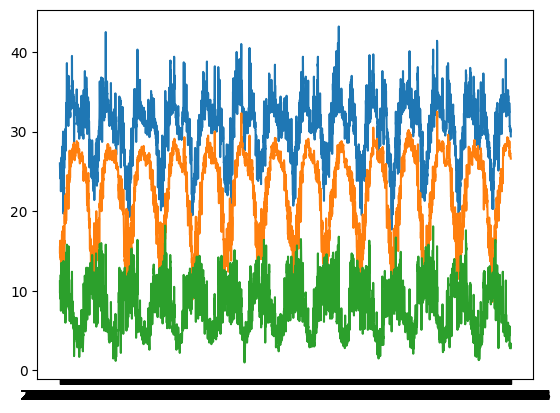

In [11]:
plt.plot(temp_max.time,temp_max.temperature_2m_max)
plt.plot(temp_min.time,temp_min.temperature_2m_min)
plt.plot(temp_range.time,temp_range.temp_range)

# Temperature Max


In [12]:
import statsmodels.api as sm
temp_max['temperature_2m_max'] = pd.to_numeric(temp_max['temperature_2m_max'], errors='coerce')
decomposition = sm.tsa.seasonal_decompose(
    temp_max['temperature_2m_max'],
    model='additive',
    period=12
)


<ipython-input-12-25049ab8890d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_max['temperature_2m_max'] = pd.to_numeric(temp_max['temperature_2m_max'], errors='coerce')


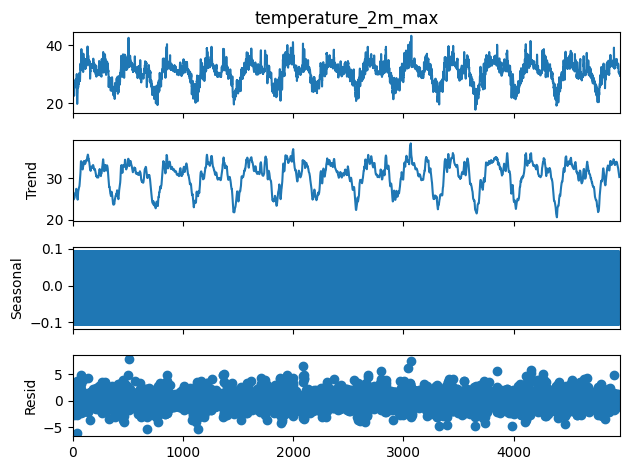

In [13]:
fig = decomposition.plot()
plt.show()

In [14]:
temp_max

,time,temperature_2m_max
0,2010-01-01,26.0
1,2010-01-02,25.3
2,2010-01-03,25.0
3,2010-01-04,25.6
4,2010-01-05,25.4
...,...,...
4961,2023-08-02,30.3
4962,2023-08-03,30.0
4963,2023-08-04,30.2
4964,2023-08-05,30.0


In [15]:
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.stattools import adfuller

In [16]:
results = adfuller(temp_max['temperature_2m_max'])
print(results[1])
results = adfuller(temp_max['temperature_2m_max'].diff().dropna())
print(results[1])
results = adfuller(temp_max['temperature_2m_max'].diff().diff().dropna())
print(results[1])

1.7528238610872657e-08
0.0
0.0


In [17]:
from pmdarima.arima.utils import ndiffs
ndiffs(temp_max.temperature_2m_max,test='adf')

0

In [18]:
from statsmodels.graphics.tsaplots import plot_pacf

<function matplotlib.pyplot.show(close=None, block=None)>

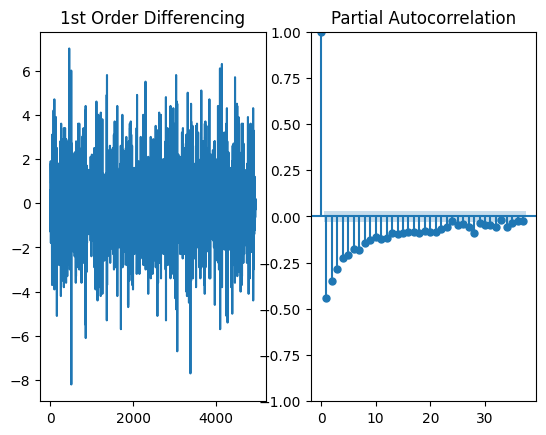

In [19]:
f = plt.figure()
ax1 = f.add_subplot(121)
ax1.set_title('1st Order Differencing')
ax1.plot(temp_max.temperature_2m_max.diff())
ax2 = f.add_subplot(122)
plot_pacf(temp_max.temperature_2m_max.diff().diff().dropna(),ax=ax2)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

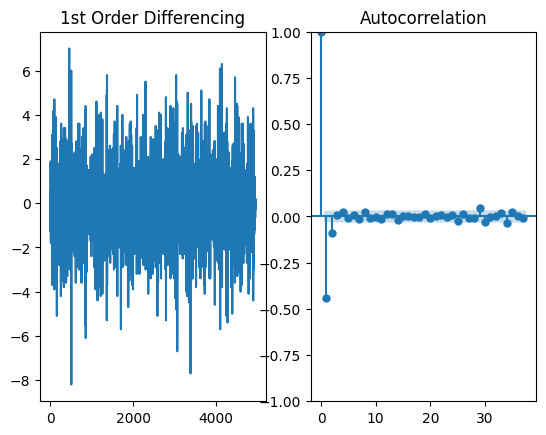

In [20]:
from statsmodels.graphics.tsaplots import plot_acf
f = plt.figure()
ax1 = f.add_subplot(121)
ax1.set_title('1st Order Differencing')
ax1.plot(temp_max.temperature_2m_max.diff())
ax2 = f.add_subplot(122)
plot_acf(temp_max.temperature_2m_max.diff().diff().dropna(),ax=ax2)
plt.show

In [21]:
results = sm.tsa.arima.ARIMA(temp_max.temperature_2m_max,order=(1,1,1))
results = results.fit()
print(results.summary())

                               SARIMAX Results                                
Dep. Variable:     temperature_2m_max   No. Observations:                 4966
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -8168.476
Date:                Mon, 28 Aug 2023   AIC                          16342.951
Time:                        09:13:09   BIC                          16362.482
Sample:                             0   HQIC                         16349.799
                               - 4966                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7193      0.019     38.637      0.000       0.683       0.756
ma.L1         -0.8893      0.013    -69.170      0.000      -0.915      -0.864
sigma2         1.5722      0.020     76.953      0.0

In [22]:
results = sm.tsa.arima.ARIMA(temp_max.temperature_2m_max,order=(1,0,1))
results = results.fit()
print(results.summary())

                               SARIMAX Results                                
Dep. Variable:     temperature_2m_max   No. Observations:                 4966
Model:                 ARIMA(1, 0, 1)   Log Likelihood               -8236.303
Date:                Mon, 28 Aug 2023   AIC                          16480.606
Time:                        09:13:11   BIC                          16506.648
Sample:                             0   HQIC                         16489.736
                               - 4966                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         30.5507      0.290    105.341      0.000      29.982      31.119
ar.L1          0.9373      0.005    199.058      0.000       0.928       0.947
ma.L1         -0.0006      0.012     -0.046      0.9

In [23]:
train_data1,test_data1 = temp_max[0:int(len(temp_max)*0.7)],temp_max[int(len(temp_max)*0.7):]
print(train_data1.index)
print(test_data1.index)
training_data = train_data1['temperature_2m_max'].values
test_data1 = test_data1['temperature_2m_max'].values

RangeIndex(start=0, stop=3476, step=1)
RangeIndex(start=3476, stop=4966, step=1)


In [24]:
history1 = [x for x in training_data]
model_predictions1 = []
N_test_observations = len(test_data1)
order = (1, 1, 1)
for time_point in range(N_test_observations):
    models = sm.tsa.ARIMA(history1, order=order)
    models_fit = models.fit()
    output = models_fit.forecast()
    yhat = output[0]
    model_predictions1.append(yhat)
    true_test_value = test_data1[time_point]
    history1.append(true_test_value)

In [25]:
import numpy as np

In [26]:
mape1=np.mean(np.abs(model_predictions1 - test_data1)/np.abs(test_data1))
MSE_error1 = mean_squared_error(test_data1, model_predictions1)

In [27]:
print('Testing Mean Absolute Percentage Error is {}'.format(mape1))
print('Testing Mean Squared Error is {}'.format(MSE_error1))

Testing Mean Absolute Percentage Error is 0.02940329060538024
Testing Mean Squared Error is 1.5166060029984496


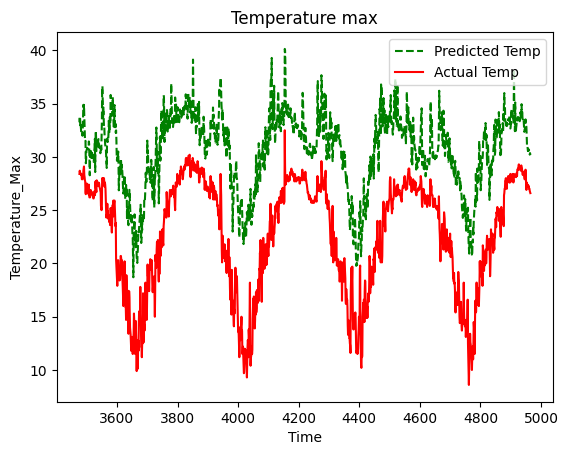

In [48]:
test_set_range = df[int(len(df)*0.7):].index
plt.plot(test_set_range, model_predictions1, color='green',linestyle='dashed', label='Predicted Temp')
plt.plot(test_set_range, test_data1, color='red', label='Actual Temp')
plt.title('Temperature max')
plt.xlabel('Time')
plt.ylabel('Temperature_Max')
plt.legend()
plt.show()

The testing time is 2019 to 2023

Testing Mean Absolute Percentage Error is 0.02940329060538024.

Testing Mean Squared Error is 1.5166060029984496.

# Temperature Minimum



In [39]:
from pmdarima.arima.utils import ndiffs
ndiffs(temp_min.temperature_2m_min,test='adf')

0

<function matplotlib.pyplot.show(close=None, block=None)>

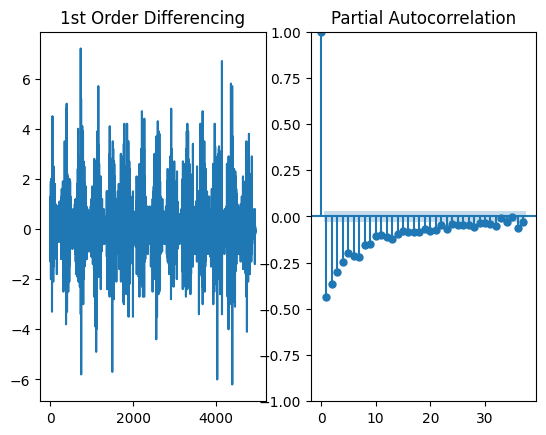

In [42]:
f = plt.figure()
ax1 = f.add_subplot(121)
ax1.set_title('1st Order Differencing')
ax1.plot(temp_min.temperature_2m_min.diff())
ax2 = f.add_subplot(122)
plot_pacf(temp_min.temperature_2m_min.diff().diff().dropna(),ax=ax2)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

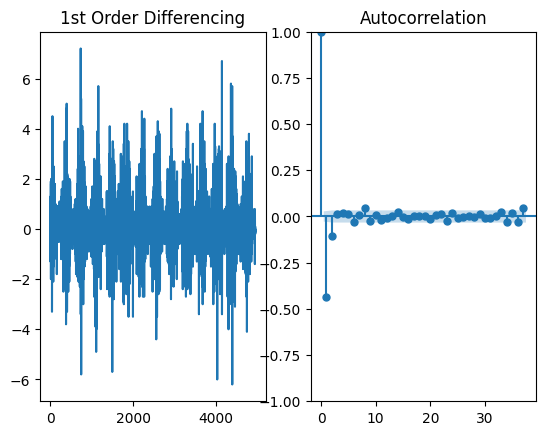

In [43]:
from statsmodels.graphics.tsaplots import plot_acf
f = plt.figure()
ax1 = f.add_subplot(121)
ax1.set_title('1st Order Differencing')
ax1.plot(temp_min.temperature_2m_min.diff())
ax2 = f.add_subplot(122)
plot_acf(temp_min.temperature_2m_min.diff().diff().dropna(),ax=ax2)
plt.show

In [45]:
train_data2,test_data2 = temp_min[0:int(len(temp_min)*0.7)],temp_min[int(len(temp_min)*0.7):]
print(train_data2.index)
print(test_data2.index)
print(test_data2)
training_data1 = train_data2['temperature_2m_min'].values
test_data1 = test_data2['temperature_2m_min'].values

RangeIndex(start=0, stop=3476, step=1)
RangeIndex(start=3476, stop=4966, step=1)
            time  temperature_2m_min
3476  2019-07-09                28.4
3477  2019-07-10                28.7
3478  2019-07-11                28.5
3479  2019-07-12                28.5
3480  2019-07-13                28.4
...          ...                 ...
4961  2023-08-02                27.0
4962  2023-08-03                27.0
4963  2023-08-04                26.8
4964  2023-08-05                26.7
4965  2023-08-06                26.6

[1490 rows x 2 columns]


In [46]:
history2 = [x for x in training_data1]
model_predictions2 = []
N_test_observations1 = len(test_data1)
order = (1, 1, 1)
for time_point in range(N_test_observations):
    models = sm.tsa.ARIMA(history2, order=order)
    models_fit = models.fit()
    output = models_fit.forecast()
    yhat = output[0]
    model_predictions2.append(yhat)
    true_test_value = test_data1[time_point]
    history2.append(true_test_value)

In [50]:
mape2=np.mean(np.abs(model_predictions2 - test_data1)/np.abs(test_data1))
MSE_error2 = mean_squared_error(test_data1, model_predictions2)
print('Testing Mean Absolute Percentage Error is {}'.format(mape2))
print('Testing Mean Squared Error is {}'.format(MSE_error2))

Testing Mean Absolute Percentage Error is 0.0353877338441959
Testing Mean Squared Error is 0.965088985556803


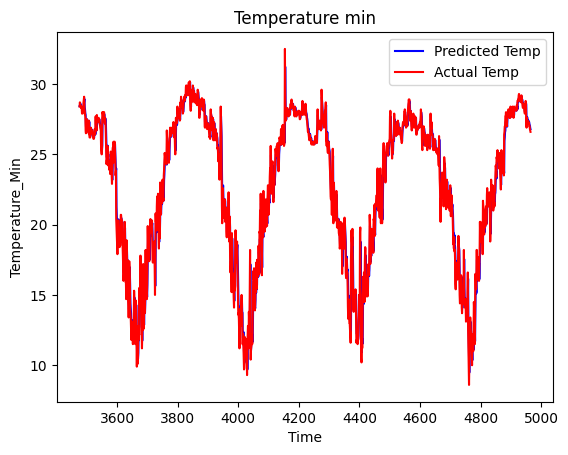

In [55]:
test_set_range1 = df[int(len(df)*0.7):].index
plt.plot(test_set_range1, model_predictions2, color='blue', label='Predicted Temp')
plt.plot(test_set_range1, test_data1, color='red', label='Actual Temp')
plt.title('Temperature min')
plt.xlabel('Time')
plt.ylabel('Temperature_Min')
plt.legend()
plt.show()

Testing Mean Absolute Percentage Error is 0.0353877338441959.

Testing Mean Squared Error is 0.965088985556803

# Temperature range

In [51]:
ndiffs(temp_range.temp_range,test='adf')

0

<function matplotlib.pyplot.show(close=None, block=None)>

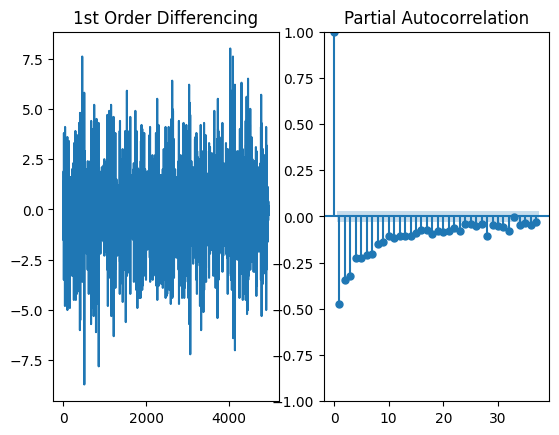

In [52]:
f = plt.figure()
ax1 = f.add_subplot(121)
ax1.set_title('1st Order Differencing')
ax1.plot(temp_range.temp_range.diff())
ax2 = f.add_subplot(122)
plot_pacf(temp_range.temp_range.diff().diff().dropna(),ax=ax2)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

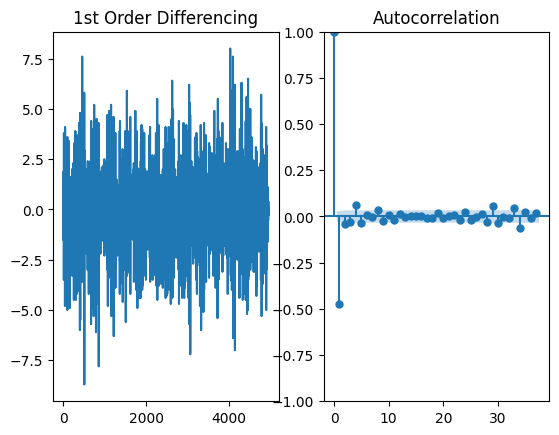

In [53]:
f = plt.figure()
ax1 = f.add_subplot(121)
ax1.set_title('1st Order Differencing')
ax1.plot(temp_range.temp_range.diff())
ax2 = f.add_subplot(122)
plot_acf(temp_range.temp_range.diff().diff().dropna(),ax=ax2)
plt.show

In [58]:
train_data2,test_data2 = temp_range[0:int(len(temp_range)*0.7)],temp_range[int(len(temp_range)*0.7):]
print(train_data2.index)
print(test_data2.index)
print(test_data2)
training_data1 = train_data2['temp_range'].values
test_data1 = test_data2['temp_range'].values

RangeIndex(start=0, stop=3476, step=1)
RangeIndex(start=3476, stop=4966, step=1)
            time  temp_range
3476  2019-07-09         4.8
3477  2019-07-10         5.1
3478  2019-07-11         4.2
3479  2019-07-12         4.5
3480  2019-07-13         4.0
...          ...         ...
4961  2023-08-02         3.3
4962  2023-08-03         3.0
4963  2023-08-04         3.4
4964  2023-08-05         3.3
4965  2023-08-06         2.8

[1490 rows x 2 columns]


In [59]:
history2 = [x for x in training_data1]
model_predictions2 = []
N_test_observations1 = len(test_data1)
order = (1, 1, 1)
for time_point in range(N_test_observations):
    models = sm.tsa.ARIMA(history2, order=order)
    models_fit = models.fit()
    output = models_fit.forecast()
    yhat = output[0]
    model_predictions2.append(yhat)
    true_test_value = test_data1[time_point]
    history2.append(true_test_value)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


In [60]:
mape2=np.mean(np.abs(model_predictions2 - test_data1)/np.abs(test_data1))
MSE_error2 = mean_squared_error(test_data1, model_predictions2)
print('Testing Mean Absolute Percentage Error is {}'.format(mape2))
print('Testing Mean Squared Error is {}'.format(MSE_error2))

Testing Mean Absolute Percentage Error is 0.14296284436371337
Testing Mean Squared Error is 1.9973116917835716


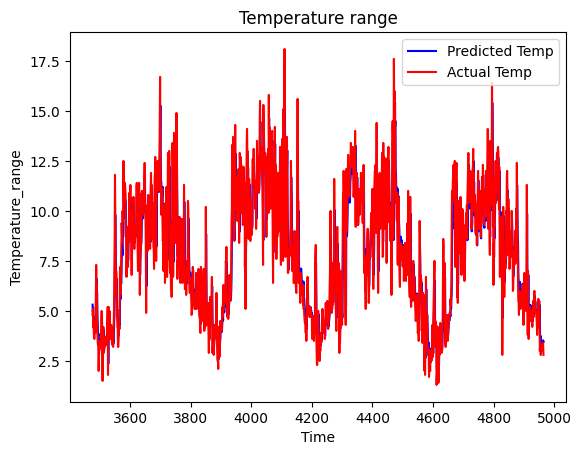

In [63]:
test_set_range1 = df[int(len(df)*0.7):].index
plt.plot(test_set_range1, model_predictions2, color='blue', label='Predicted Temp')
plt.plot(test_set_range1, test_data1, color='red', label='Actual Temp')
plt.title('Temperature range')
plt.xlabel('Time')
plt.ylabel('Temperature_range')
plt.legend()
plt.show()

Testing Mean Absolute Percentage Error is 0.14296284436371337

Testing Mean Squared Error is 1.9973116917835716

# **Summary**

I used ARIMA model to forecast the Temperature Maximum, Minimum and Range. The testing years were 2019 to 2023.

**The Mean Absolute Percentage Error:**

*Temperature Range* = 0.14296284436371337

*Temperature Maximum*= 0.02940329060538024.

*Temperature Minimum*= 0.0353877338441959.

**The Mean Squared Error:**

*Temperature Range* = 1.9973116917835716.

*Temperature Maximum* = 1.5166060029984496.

*Temperature Minimum* = 0.965088985556803.